## Cheminformatics- RDKit

### Drawing Molecules

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [2]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

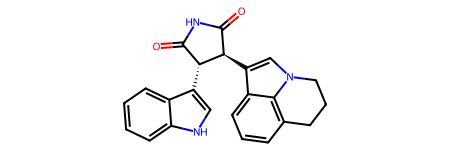

In [3]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
mol

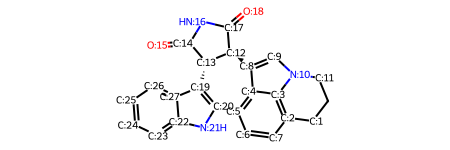

In [4]:
# With atom index
mol_with_atom_index(mol)

### Draw a molecule with bond index numbers

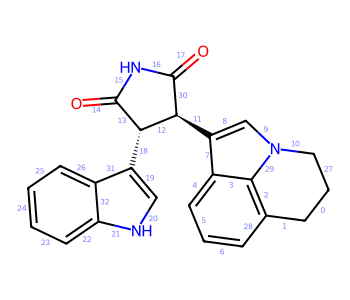

In [5]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
IPythonConsole.drawOptions.addBondIndices = True
IPythonConsole.molSize = 350,300
mol

### Draw a molecule with a caluclation value displayed

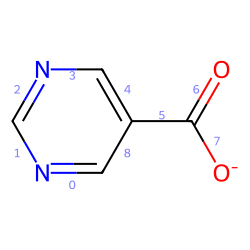

In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 250,250

m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
AllChem.ComputeGasteigerCharges(m)
m

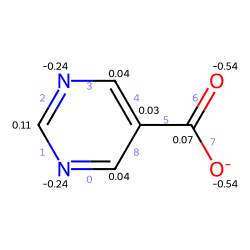

In [8]:
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
m2

### molecule with stereochemistry annotations 

In [9]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

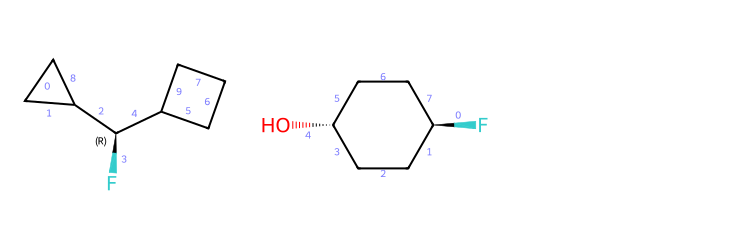

In [10]:
# find MolChiral Centers
m1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m2 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))


## Draw molecule in black and white

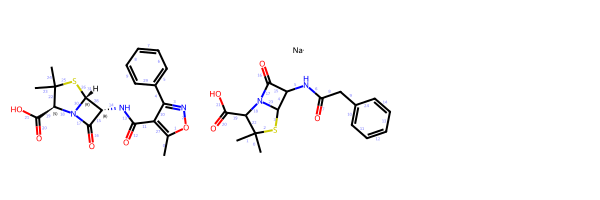

In [11]:
ms = [Chem.MolFromSmiles(x) for x in ('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12','CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')]
Draw.MolsToGridImage(ms)

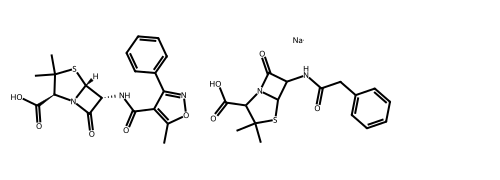

In [12]:
# use the rdMolDraw2D package
from rdkit.Chem.Draw import rdMolDraw2D
import io
from PIL import Image

drawer = rdMolDraw2D.MolDraw2DCairo(500,180,200,180)
drawer.drawOptions().useBWAtomPalette()
drawer.DrawMolecules(ms)
drawer.FinishDrawing()
bio = io.BytesIO(drawer.GetDrawingText())
Image.open(bio)

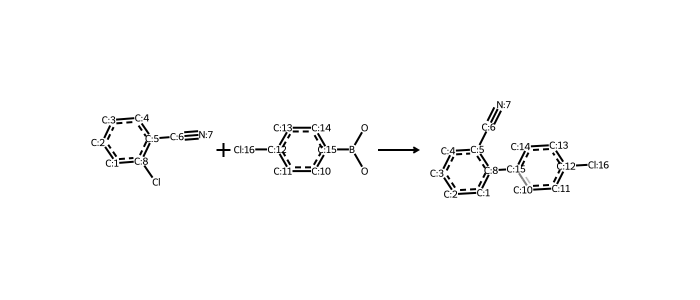

In [14]:
# works for reaction too
from rdkit.Chem import rdChemReactions
rxn = rdChemReactions.ReactionFromSmarts("[cH:1]:1:[cH:2]:[cH:3]:[cH:4]:[cH:5](-[C:6]#[N:7]):[c:8]:1-[Cl].\
[cH:10]:1:[cH:11]:[cH:12](-[Cl:16]):[cH:13]:[cH:14]:[cH:15]:1-B(-O)-O>>\
[cH:1]:1:[cH:2]:[cH:3]:[cH:4]:[cH:5](-[C:6]#[N:7]):[c:8]:1-[cH:15]:1[cH:10]:[cH:11]:[cH:12](-[Cl:16]):[cH:13]:[cH:14]:1")
drawer = rdMolDraw2D.MolDraw2DCairo(700,300)
drawer.drawOptions().useBWAtomPalette()
drawer.DrawReaction(rxn)
drawer.FinishDrawing()
bio = io.BytesIO(drawer.GetDrawingText())
Image.open(bio)

### molecule with substructure highlight

In [17]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


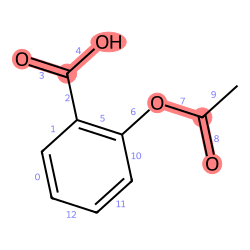

In [19]:
m

### Highlight molecule differences based on maximum common substructure

In [20]:
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize=20

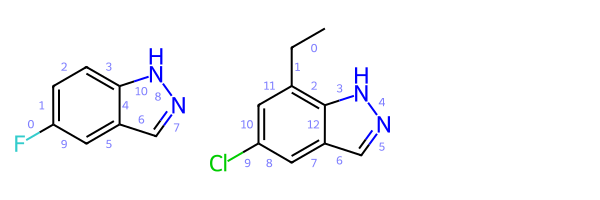

In [21]:
mol1 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
mol2 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')
Draw.MolsToGridImage([mol1, mol2])

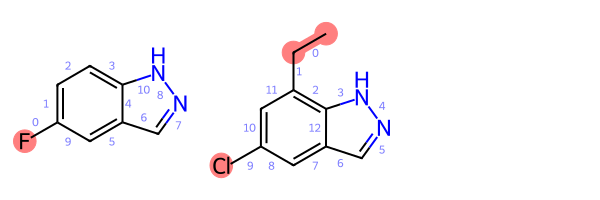

In [22]:
def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return Draw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])

view_difference(mol1,mol2)

### Highlight all atoms and bonds

In [23]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
import io
from PIL import Image

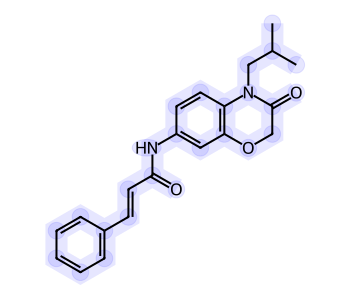

In [24]:
mol = Chem.MolFromSmiles('CC(C)CN1C(=O)COC2=C1C=CC(=C2)NC(=O)/C=C/C3=CC=CC=C3')
rgba_color = (0.0, 0.0, 1.0, 0.1) # transparent blue

atoms = []
for a in mol.GetAtoms():
    atoms.append(a.GetIdx())

bonds = []
for bond in mol.GetBonds():
    aid1 = atoms[bond.GetBeginAtomIdx()]
    aid2 = atoms[bond.GetEndAtomIdx()]
    bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

drawer = rdMolDraw2D.MolDraw2DCairo(350,300)
drawer.drawOptions().fillHighlights=True
drawer.drawOptions().setHighlightColour((rgba_color))
drawer.drawOptions().highlightBondWidthMultiplier=20
drawer.drawOptions().clearBackground = False
rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=atoms, highlightBonds=bonds)
bio = io.BytesIO(drawer.GetDrawingText())
Image.open(bio)

### Draw a molecule with functional group

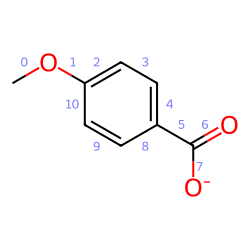

In [25]:
from rdkit.Chem import Draw
from rdkit.Chem import rdAbbreviations

m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m

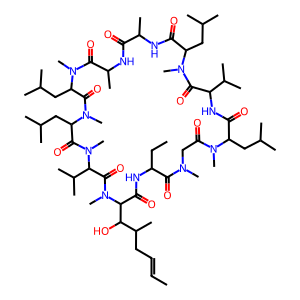

In [26]:
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

mol = Chem.MolFromSmiles("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
drawer = rdMolDraw2D.MolDraw2DSVG(300,300)
drawer.drawOptions().addStereoAnnotation = False
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
SVG(drawer.GetDrawingText())

### Draw a molecule on a matplotlib plot.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

(-0.5, 299.5, 299.5, -0.5)

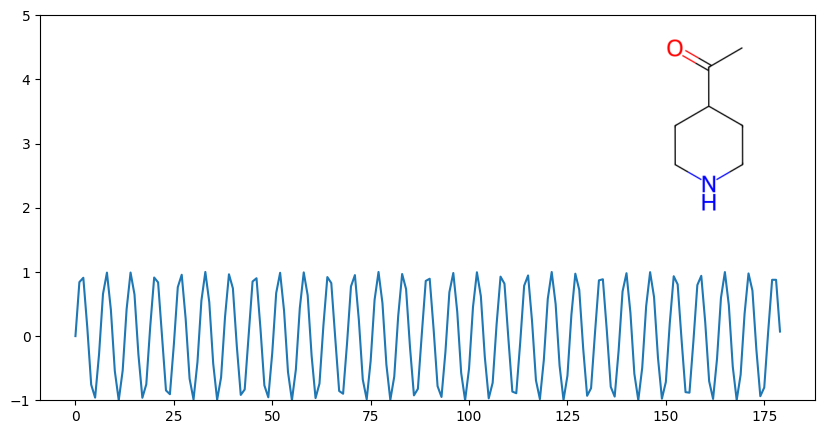

In [28]:
x = np.arange(0, 180, 1)
y = np.sin(x)
mol = Chem.MolFromSmiles('C1CNCCC1C(=O)C')
im = Chem.Draw.MolToImage(mol)
fig = plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.ylim(-1, 5)
ax = plt.axes([0.6, 0.47, 0.38, 0.38], frameon=True)
ax.imshow(im)
ax.axis('off')



### Hybridization Type and Count

In [29]:
m = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
for x in m.GetAtoms():
    print(x.GetIdx(), x.GetHybridization())

0 SP3
1 SP2
2 SP2
3 SP2
4 SP2
5 SP2
6 SP2
7 SP2
8 SP2
9 SP2
10 SP2
11 SP2
12 SP3
13 SP3


In [30]:
m = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
print(sum((x.GetHybridization() == Chem.HybridizationType.SP3) for x in m.GetAtoms()))

3


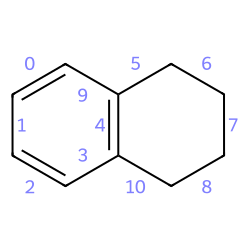

In [31]:
# Identify Aromatic Rings
m = Chem.MolFromSmiles('c1cccc2c1CCCC2')
m

In [32]:
ri = m.GetRingInfo()
print(ri.AtomRings())

((0, 5, 4, 3, 2, 1), (6, 7, 8, 9, 4, 5))


In [33]:
print(ri.BondRings())

((9, 4, 3, 2, 1, 0), (6, 7, 8, 10, 4, 5))


### Find chiral centers and double bond stereochemistry

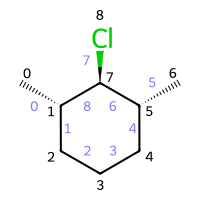

In [34]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = False
IPythonConsole.molSize = 200,200

m = Chem.MolFromSmiles("C[C@H]1CCC[C@@H](C)[C@@H]1Cl")
m


In [35]:
print(Chem.FindMolChiralCenters(m,force=True,includeUnassigned=True,useLegacyImplementation=False))

[(1, 'S'), (5, 'R'), (7, 'r')]


<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16472\1646787609.py:3: SyntaxWarning: invalid escape sequence '\C'
  mol = Chem.MolFromSmiles("C\C=C(/F)\C(=C\F)\C=C")


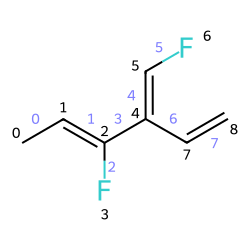

In [36]:
# Identifying Double Bond Stereochemistry
IPythonConsole.molSize = 250,250
mol = Chem.MolFromSmiles("C\C=C(/F)\C(=C\F)\C=C")
mol

In [37]:
# Using GetStereo()
for b in mol.GetBonds():
    print(b.GetBeginAtomIdx(),b.GetEndAtomIdx(),
          b.GetBondType(),b.GetStereo())

0 1 SINGLE STEREONONE
1 2 DOUBLE STEREOZ
2 3 SINGLE STEREONONE
2 4 SINGLE STEREONONE
4 5 DOUBLE STEREOE
5 6 SINGLE STEREONONE
4 7 SINGLE STEREONONE
7 8 DOUBLE STEREONONE


### Neutralize charged molecules by atom

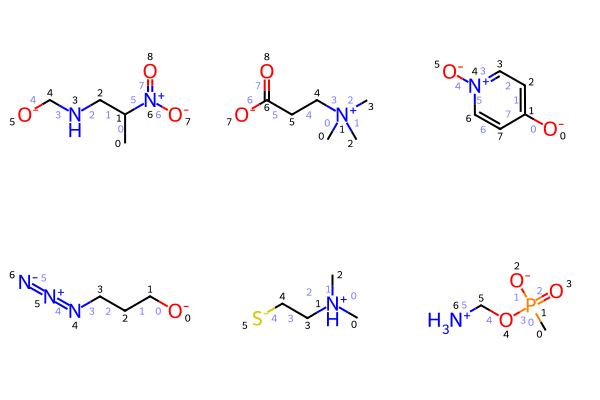

In [38]:
# list of SMILES
smiList = ['CC(CNC[O-])[N+]([O-])=O',
       'C[N+](C)(C)CCC([O-])=O',
       '[O-]C1=CC=[N+]([O-])C=C1',
       '[O-]CCCN=[N+]=[N-]',
       'C[NH+](C)CC[S-]',
       'CP([O-])(=O)OC[NH3+]']

mols = [Chem.MolFromSmiles(m) for m in smiList]

Draw.MolsToGridImage(mols,molsPerRow=3,subImgSize=(200,200))

In [41]:
def neutralize_atoms(mol):
    pattern = Chem.MolFromSmarts("[+1!h0!$([*]~[-1,-2,-3,-4]),-1!$([*]~[+1,+2,+3,+4])]")
    at_matches = mol.GetSubstructMatches(pattern)
    at_matches_list = [y[0] for y in at_matches]
    if len(at_matches_list) > 0:
        for at_idx in at_matches_list:
            atom = mol.GetAtomWithIdx(at_idx)
            chg = atom.GetFormalCharge()
            hcount = atom.GetTotalNumHs()
            atom.SetFormalCharge(0)
            atom.SetNumExplicitHs(hcount - chg)
            atom.UpdatePropertyCache()
    return mol

CC(CNCO)[N+](=O)[O-]
C[N+](C)(C)CCC(=O)O
[O-][n+]1ccc(O)cc1
[N-]=[N+]=NCCCO
CN(C)CCS
CP(=O)(O)OCN


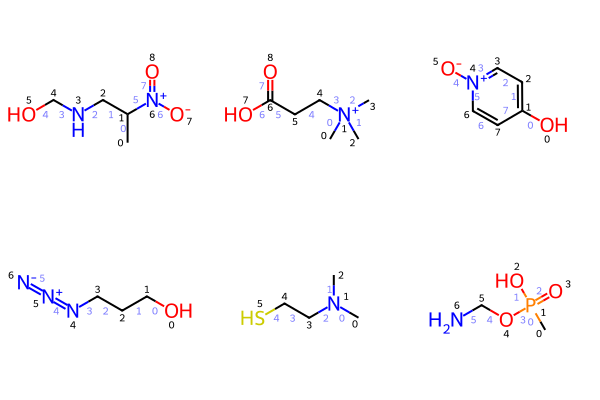

In [42]:
# Neutralize molecules by atom
for mol in mols:
    neutralize_atoms(mol)
    print(Chem.MolToSmiles(mol))

Draw.MolsToGridImage(mols,molsPerRow=3, subImgSize=(200,200))

## Descriptor Calculations
-Calculate hash strings for molecules with the NextMove MolHash functionality

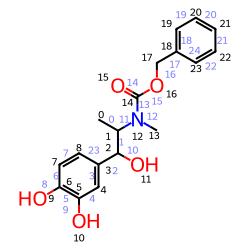

In [43]:
from rdkit.Chem import rdMolHash
s = Chem.MolFromSmiles('CC(C(C1=CC(=C(C=C1)O)O)O)N(C)C(=O)OCC2=CC=CC=C2')
s

In [44]:
molhashf = rdMolHash.HashFunction.names
print(molhashf)

{'AnonymousGraph': rdkit.Chem.rdMolHash.HashFunction.AnonymousGraph, 'ElementGraph': rdkit.Chem.rdMolHash.HashFunction.ElementGraph, 'CanonicalSmiles': rdkit.Chem.rdMolHash.HashFunction.CanonicalSmiles, 'MurckoScaffold': rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold, 'ExtendedMurcko': rdkit.Chem.rdMolHash.HashFunction.ExtendedMurcko, 'MolFormula': rdkit.Chem.rdMolHash.HashFunction.MolFormula, 'AtomBondCounts': rdkit.Chem.rdMolHash.HashFunction.AtomBondCounts, 'DegreeVector': rdkit.Chem.rdMolHash.HashFunction.DegreeVector, 'Mesomer': rdkit.Chem.rdMolHash.HashFunction.Mesomer, 'HetAtomTautomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomTautomer, 'HetAtomProtomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomProtomer, 'RedoxPair': rdkit.Chem.rdMolHash.HashFunction.RedoxPair, 'Regioisomer': rdkit.Chem.rdMolHash.HashFunction.Regioisomer, 'NetCharge': rdkit.Chem.rdMolHash.HashFunction.NetCharge, 'SmallWorldIndexBR': rdkit.Chem.rdMolHash.HashFunction.SmallWorldIndexBR, 'SmallWorldIndexBRL': r

In [45]:
# Generate MolHashes for molecule 's' with all defined hash functions.
for i, j in molhashf.items():
    print(i, rdMolHash.MolHash(s, j))

AnonymousGraph **1***(*(*)*(*)*(*)*(*)***2*****2)**1*
ElementGraph CC(C(O)C1CCC(O)C(O)C1)N(C)C(O)OCC1CCCCC1
CanonicalSmiles CC(C(O)c1ccc(O)c(O)c1)N(C)C(=O)OCc1ccccc1
MurckoScaffold c1ccc(CCNCOCc2ccccc2)cc1
ExtendedMurcko *c1ccc(C(*)C(*)N(*)C(=*)OCc2ccccc2)cc1*
MolFormula C18H21NO5
AtomBondCounts 24,25
DegreeVector 0,8,10,6
Mesomer CC(C(O)[C]1[CH][CH][C](O)[C](O)[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1_0
HetAtomTautomer CC(C([O])[C]1[CH][CH][C]([O])[C]([O])[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1_3_0
HetAtomProtomer CC(C([O])[C]1[CH][CH][C]([O])[C]([O])[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1_3
RedoxPair CC(C(O)[C]1[CH][CH][C](O)[C](O)[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1
Regioisomer *C.*CCC.*O.*O.*O.*OC(=O)N(*)*.C.c1ccccc1.c1ccccc1
NetCharge 0
SmallWorldIndexBR B25R2
SmallWorldIndexBRL B25R2L10
ArthorSubstructureOrder 00180019010012000600009b000000
HetAtomTautomerv2 [CH3]-[CH](-[CH](-[OH])-[C]1:[C]:[C]:[C](:[O]):[C](:[O]):[C]:1)-[N](-[CH3])-[C](=[O])-[O]-[CH2]-[c

In [51]:
# Murcko Scaffold Hashes (from slide 16 in [ref2])
# Create a list of SMILES
mList = ['CCC1CC(CCC1=O)C(=O)C1=CC=CC(C)=C1','CCC1CC(CCC1=O)C(=O)C1=CC=CC=C1',\
         'CC(=C)C(C1=CC=CC=C1)S(=O)CC(N)=O','CC1=CC(=CC=C1)C(C1CCC(N)CC1)C(F)(F)F',\
         'CNC1CCC(C2=CC(Cl)=C(Cl)C=C2)C2=CC=CC=C12','CCCOC(C1CCCCC1)C1=CC=C(Cl)C=C1']

In [52]:
# Loop through the SMILES mList and create RDKit molecular objects
mMols = [Chem.MolFromSmiles(m) for m in mList]
# Calculate Murcko Scaffold Hashes
murckoHashList = [rdMolHash.MolHash(mMol, rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold) for mMol in mMols]
print(murckoHashList)

['c1ccc(CC2CCCCC2)cc1', 'c1ccc(CC2CCCCC2)cc1', 'c1ccccc1', 'c1ccc(CC2CCCCC2)cc1', 'c1ccc(C2CCCc3ccccc32)cc1', 'c1ccc(CC2CCCCC2)cc1']


In [53]:
# Get the most frequent Murcko Scaffold Hash
def mostFreq(list):
    return max(set(list), key=list.count)
mostFreq_murckoHash = mostFreq(murckoHashList)
print(mostFreq_murckoHash)

c1ccc(CC2CCCCC2)cc1


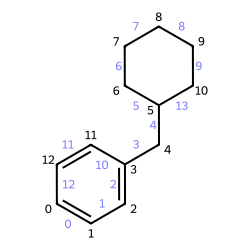

In [54]:
mostFreq_murckoHash_mol = Chem.MolFromSmiles('c1ccc(CC2CCCCC2)cc1')
mostFreq_murckoHash_mol

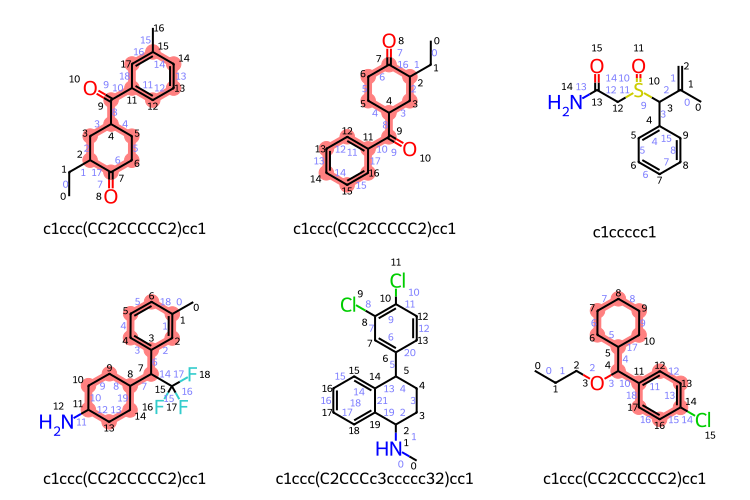

In [55]:
# Display molecules with MurkoHash as legends and highlight the mostFreq_murckoHash
highlight_mostFreq_murckoHash = [mMol.GetSubstructMatch(mostFreq_murckoHash_mol) for mMol in mMols]
Draw.MolsToGridImage(mMols,legends=[murckoHash for murckoHash in murckoHashList],
                     highlightAtomLists = highlight_mostFreq_murckoHash,
                     subImgSize=(250,250), useSVG=False)

### Calculate the largest number of contiguous rotable bonds

In [56]:
from rdkit import Chem
from rdkit.Chem.Lipinski import RotatableBondSmarts

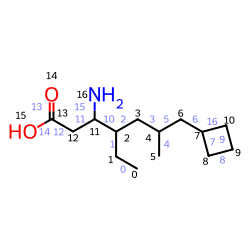

In [57]:
mol = Chem.MolFromSmiles('CCC(CC(C)CC1CCC1)C(CC(=O)O)N')
mol

In [58]:
def find_bond_groups(mol):
    """Find groups of contiguous rotatable bonds and return them sorted by decreasing size"""
    rot_atom_pairs = mol.GetSubstructMatches(RotatableBondSmarts)
    rot_bond_set = set([mol.GetBondBetweenAtoms(*ap).GetIdx() for ap in rot_atom_pairs])
    rot_bond_groups = []
    while (rot_bond_set):
        i = rot_bond_set.pop()
        connected_bond_set = set([i])
        stack = [i]
        while (stack):
            i = stack.pop()
            b = mol.GetBondWithIdx(i)
            bonds = []
            for a in (b.GetBeginAtom(), b.GetEndAtom()):
                bonds.extend([b.GetIdx() for b in a.GetBonds() if (
                    (b.GetIdx() in rot_bond_set) and (not (b.GetIdx() in connected_bond_set)))])
            connected_bond_set.update(bonds)
            stack.extend(bonds)
        rot_bond_set.difference_update(connected_bond_set)
        rot_bond_groups.append(tuple(connected_bond_set))
    return tuple(sorted(rot_bond_groups, reverse = True, key = lambda x: len(x)))

8
((1, 2, 3, 5, 6, 10, 11, 12),)


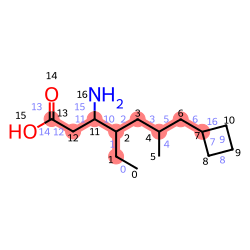

In [59]:
# Find groups of contiguous rotatable bonds in mol
bond_groups = find_bond_groups(mol)


# As bond groups are sorted by decreasing size, the size of the first group (if any)
# is the largest number of contiguous rotatable bonds in mol
largest_n_cont_rot_bonds = len(bond_groups[0]) if bond_groups else 0
print(largest_n_cont_rot_bonds)
print(bond_groups)
mol
